In [1]:
# importing all the important packages 

import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# obtaining current working directory
os.getcwd()

'C:\\Users\\Kush\\Training & Placement'

In [3]:
# reading the csv file and creating a data frame
df = pd.read_csv("C:\\Users\\Kush\\Training & Placement\\bank-marketing.csv")
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Looking at the data dimensions
df.shape

(45211, 19)

In [5]:
print("The data contains 45211 Rows and 19 Columns")

The data contains 45211 Rows and 19 Columns


In [6]:
# checking the datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [7]:
# checking for null values in dataset, if there is any
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [8]:
# description of numerical columns in the data
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
# mean, 25th, 50th, 75th percentile of PDAYS column seems to be fishy, will deal with it later

#### looking for distinct values in some columns

In [10]:
print(df['salary'].unique())

[100000  60000 120000  20000      0  55000  50000  70000   8000  16000
   4000]


In [11]:
print(df['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [12]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
# replacing the unknown in job column by mode value
df['job'].replace({"unknown":"blue-collar"}, inplace=True)
#df['job'].value_counts()

In [14]:
print(df['marital'].unique())

['married' 'single' 'divorced']


In [15]:
print(df['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary']


In [16]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [17]:
23202+13301+6851+1857

45211

In [18]:
print("secondary =",np.around(23202/45211*100,2),"%")
print("tertiary =",np.around(13301/45211*100,2),"%")
print("primary =",np.around(6851/45211*100,2),"%")
print("unknown =",np.around(1857/45211*100,2),"%")

secondary = 51.32 %
tertiary = 29.42 %
primary = 15.15 %
unknown = 4.11 %


In [19]:
df.drop(df[df['education'] == 'unknown'].index, inplace = True)

In [20]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [21]:
print(df['targeted'].unique())

['yes' 'no']


In [22]:
print(df['default'].unique())

['no' 'yes']


In [23]:
print(df['housing'].unique())

['yes' 'no']


In [24]:
print(df['loan'].unique())

['no' 'yes']


In [25]:
print(df['contact'].unique())

['unknown' 'cellular' 'telephone']


In [26]:
df['contact'].replace({"unknown":"no"}, inplace=True)
df['contact'].replace({"cellular":"yes"}, inplace=True)
df['contact'].replace({"telephone":"yes"}, inplace=True)

In [27]:
print(df['contact'].unique())

['no' 'yes']


In [28]:
print(df['month'].unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [29]:
df['pdays'].describe()

count    43354.000000
mean        40.340960
std        100.331955
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [30]:
df.drop('pdays',axis = 1, inplace = True)

In [31]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,no,5,may,261,1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,no,5,may,151,1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,no,5,may,76,1,0,unknown,no
5,35,management,100000,married,tertiary,yes,no,231,yes,no,no,5,may,139,1,0,unknown,no
6,28,management,100000,single,tertiary,no,no,447,yes,yes,no,5,may,217,1,0,unknown,no


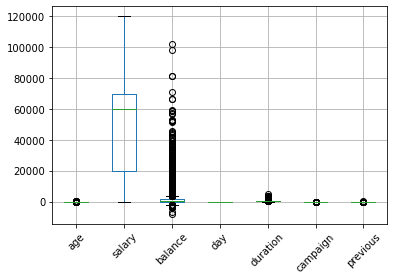

In [32]:
df.boxplot()
plt.xticks(rotation = 45)
plt.show()

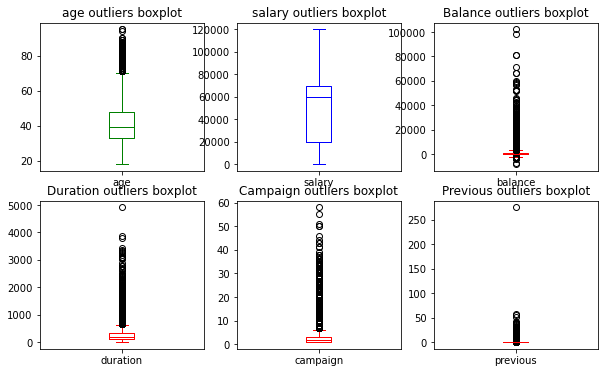

In [33]:
fig, ax = plt.subplots(nrows = 2 , ncols = 3, figsize = (10,6))
df['age'].plot(kind = "box" , color = "g", ax = ax[0,0])
ax[0,0].set_title("age outliers boxplot")
df['salary'].plot(kind = "box" , color = "b", ax = ax[0,1])
ax[0,1].set_title("salary outliers boxplot")
df['balance'].plot(kind = "box" , color = "r", ax = ax[0,2])
ax[0,2].set_title("Balance outliers boxplot")
df['duration'].plot(kind = "box" , color = "r", ax = ax[1,0])
ax[1,0].set_title("Duration outliers boxplot")
df['campaign'].plot(kind = "box" , color = "r", ax = ax[1,1])
ax[1,1].set_title("Campaign outliers boxplot")
df['previous'].plot(kind = "box" , color = "r", ax = ax[1,2])
ax[1,2].set_title("Previous outliers boxplot")
plt.show()

In [34]:
q1,q2,q3 = np.quantile(df['age'],0.25), np.quantile(df['age'],0.50), np.quantile(df['age'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['age'] = np.where(df['age']>uw,uw,df['age'])
df['age'] = np.where(df['age']<lw,lw,df['age'])

In [35]:
q1,q2,q3 = np.quantile(df['balance'],0.25), np.quantile(df['balance'],0.50), np.quantile(df['balance'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['balance'] = np.where(df['balance']>uw,uw,df['balance'])
df['balance'] = np.where(df['balance']<lw,lw,df['balance'])

In [36]:
q1,q2,q3 = np.quantile(df['duration'],0.25), np.quantile(df['duration'],0.50), np.quantile(df['duration'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['duration'] = np.where(df['duration']>uw,uw,df['duration'])
df['duration'] = np.where(df['duration']<lw,lw,df['duration'])

In [37]:
q1,q2,q3 = np.quantile(df['campaign'],0.25), np.quantile(df['campaign'],0.50), np.quantile(df['campaign'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['campaign'] = np.where(df['campaign']>uw,uw,df['campaign'])
df['campaign'] = np.where(df['campaign']<lw,lw,df['campaign'])

In [38]:
q1,q2,q3 = np.quantile(df['previous'],0.25), np.quantile(df['previous'],0.50), np.quantile(df['previous'],0.75)
IQR = q3-q1
uw,lw = q3+(1.5*IQR), q1-(1.5*IQR)
df['previous'] = np.where(df['previous']>uw,uw,df['previous'])
df['previous'] = np.where(df['previous']<lw,lw,df['previous'])

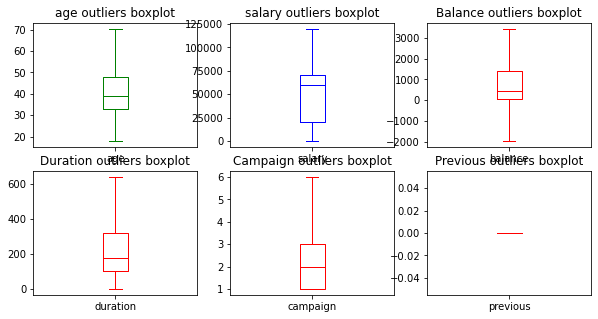

In [39]:
fig, ax = plt.subplots(nrows = 2 , ncols = 3, figsize = (10,5))
df['age'].plot(kind = "box" , color = "g", ax = ax[0,0])
ax[0,0].set_title("age outliers boxplot")
df['salary'].plot(kind = "box" , color = "b", ax = ax[0,1])
ax[0,1].set_title("salary outliers boxplot")
df['balance'].plot(kind = "box" , color = "r", ax = ax[0,2])
ax[0,2].set_title("Balance outliers boxplot")
df['duration'].plot(kind = "box" , color = "r", ax = ax[1,0])
ax[1,0].set_title("Duration outliers boxplot")
df['campaign'].plot(kind = "box" , color = "r", ax = ax[1,1])
ax[1,1].set_title("Campaign outliers boxplot")
df['previous'].plot(kind = "box" , color = "r", ax = ax[1,2])
ax[1,2].set_title("Previous outliers boxplot")
plt.show()

In [40]:
#Replacing response column values from yes and no to binary form 1 and 0
df['response'].replace({'no':0,'yes':1}, inplace = True)

Percentage of response as no =  88.38169488397841
Percentage of response as yes =  11.61830511602159
0    38317
1     5037
Name: response, dtype: int64


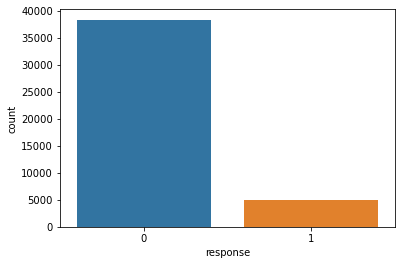

In [41]:
#Let's check the reponse percentage of campaing
no = len(df[df['response'] == 0])
yes = len(df[df['response'] == 1])
no_percent = (no / len(df['response']))*100
yes_percent = (yes / len(df['response']))*100
print('Percentage of response as no = ',no_percent)
print('Percentage of response as yes = ',yes_percent)
print((df['response'].value_counts()))

sns.countplot(x=df['response'],  data=df)
plt.show()

In [42]:
# bifurcating the data into object type and numerical type
catcol = []
numcol = []
for i in df.columns:
    if df[i].dtype=="O":
        catcol.append(i)
    else:
        numcol.append(i) 

In [43]:
print("Object data type features ",catcol)
print("Numerical data type features ",numcol)

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'previous', 'response']


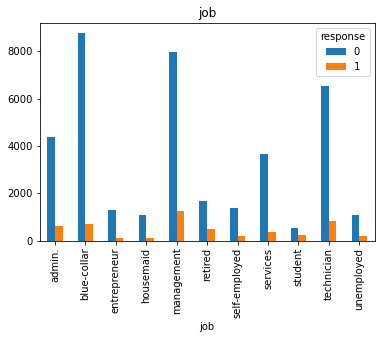

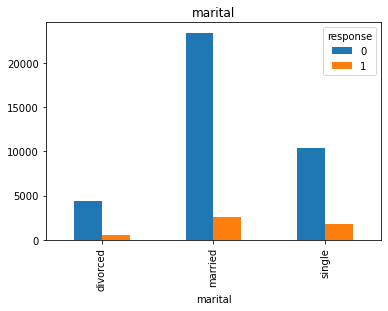

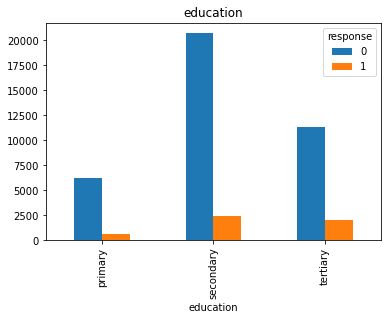

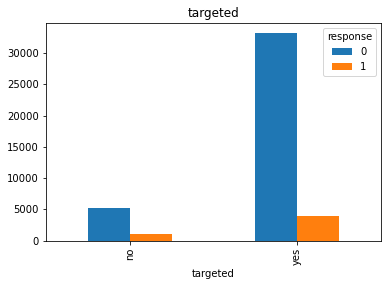

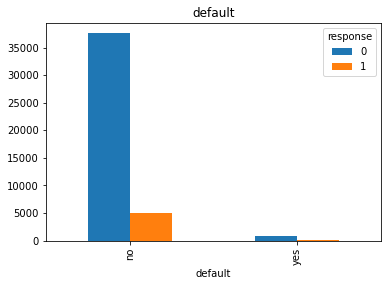

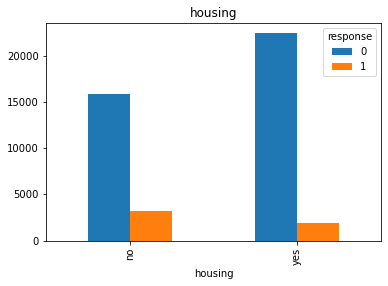

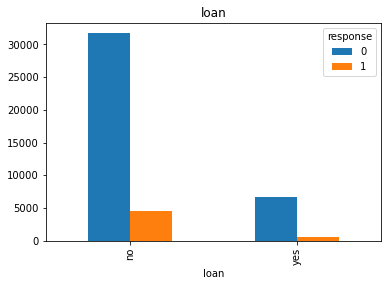

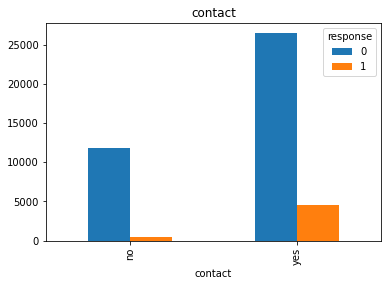

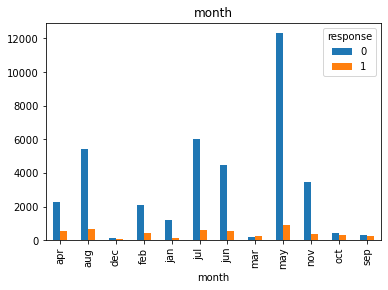

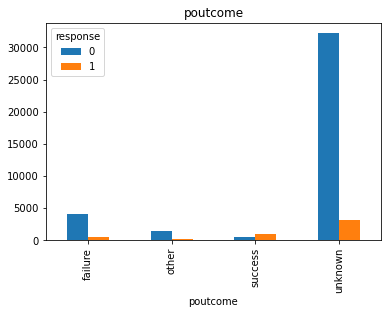

In [44]:
#Printing graphs for all the catagorical values using for loop
#We can get the relation information of all the catagorical columns with response
for col in catcol:
    pd.crosstab(df[col], df['response']).plot(kind='bar')
    plt.title(col)

C:\Users\Kush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


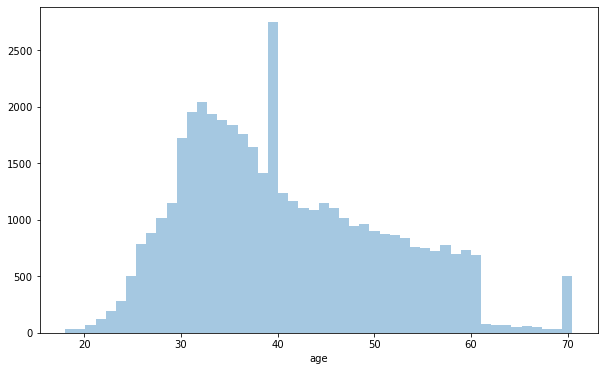

In [45]:
plt.figure(figsize=(10,6))
sns.distplot(a = df['age'], kde = False)
plt.show()

In [46]:
#We observe that most of the users/clients are within age 30-45 and very less above 60

In [47]:
# Converting categorical variables into numerical variables

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
df1 = df[catcol].apply(LabelEncoder().fit_transform)
df1.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
0,4,1,2,1,0,1,0,0,8,3
1,9,2,1,1,0,1,0,0,8,3
2,2,1,1,1,0,1,1,0,8,3
5,4,1,2,1,0,1,0,0,8,3
6,4,2,2,0,0,1,1,0,8,3


In [50]:
df = df1.join(df[numcol])
df.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,previous,response
0,4,1,2,1,0,1,0,0,8,3,58.0,100000,2143.0,5,261.0,1.0,0.0,0
1,9,2,1,1,0,1,0,0,8,3,44.0,60000,29.0,5,151.0,1.0,0.0,0
2,2,1,1,1,0,1,1,0,8,3,33.0,120000,2.0,5,76.0,1.0,0.0,0
5,4,1,2,1,0,1,0,0,8,3,35.0,100000,231.0,5,139.0,1.0,0.0,0
6,4,2,2,0,0,1,1,0,8,3,28.0,100000,447.0,5,217.0,1.0,0.0,0


In [51]:
df.job = df.job.astype('category')
df.marital = df.marital.astype('category')
df.education = df.education.astype('category')
df.targeted = df.targeted.astype('category')
df.default = df.targeted.astype('category')
df.housing = df.targeted.astype('category')
df.loan = df.loan.astype('category')
df.contact = df.contact.astype('category')
df.month = df.month.astype('category')
df.poutcome = df.poutcome.astype('category')

## Making Logistic Regression Model

In [52]:
from sklearn.model_selection import train_test_split
x = df.drop('response', axis =1)
y = df['response']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [53]:
#Getting length of both train and test
print('Length of x_train :', len(x_train), '\nLength of y_train :',len(y_train))
print('Length of x_test :', len(x_test), '\nLength of y_test :',len(y_test))

Length of x_train : 34683 
Length of y_train : 34683
Length of x_test : 8671 
Length of y_test : 8671


In [54]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print('Train Accuracy is:', np.around(lr.score(x_train,y_train)*100,2),"%")
print('Test Accuracy is:', np.around(lr.score(x_test,y_test)*100,2),"%")

Train Accuracy is: 88.71 %
Test Accuracy is: 88.85 %


In [56]:
y_pred = lr.predict(x_test)

In [57]:
prediction1 = pd.DataFrame({"Actual data":y_test,"Predicted data":y_pred})
prediction1.head(10)

,Actual data,Predicted data
31594,0,0
41920,1,0
10536,0,0
39867,1,1
17066,0,0
4106,0,0
11397,0,0
11767,0,0
11482,0,0
21434,0,0


In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[7464,  228],
       [ 739,  240]], dtype=int64)

In [59]:
print("% of errors = ", np.around((739+228)/(7464+240+739+228)*100,2),"%")
print("Wrong predictions = ",(739+228) ,"out of",(7464+240+739+228),"predicted values" )

% of errors =  11.15 %
Wrong predictions =  967 out of 8671 predicted values


In [60]:
from sklearn import metrics
print('Accuracy = ', np.around(metrics.accuracy_score (y_test,y_pred)*100,2))
print('Precision = ', np.around(metrics.precision_score (y_test,y_pred)*100,2))
print('Recall = ', np.around(metrics.recall_score (y_test,y_pred)*100,2))

Accuracy =  88.85
Precision =  51.28
Recall =  24.51


In [61]:
from sklearn import metrics
print("Accuracy:",round(metrics.accuracy_score(y_test,y_pred)*100,2))
em = metrics.classification_report(y_test,y_pred)
print("error matrix:",em)

Accuracy: 88.85
error matrix:               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7692
           1       0.51      0.25      0.33       979

    accuracy                           0.89      8671
   macro avg       0.71      0.61      0.64      8671
weighted avg       0.87      0.89      0.87      8671



## Building Random Forest Model

In [62]:
# Train test split is already imported above
# Splitting the data again because Random forest doesn't require Feature Scaling
x1 = df.drop('response', axis =1)
y1 = df['response']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state = 0)

In [63]:
#Building Random forest with 50 trees and max_depth = 2
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x1_train,y1_train)

RandomForestClassifier()

In [64]:
y1_pred = rfc.predict(x1_test)
print(y1_pred)

[0 1 0 ... 0 0 0]


In [65]:
prediction1 = pd.DataFrame({"Actual data":y1_test,"Predicted data":y1_pred})
prediction1.head(10)

,Actual data,Predicted data
31594,0,0
41920,1,1
10536,0,0
39867,1,1
17066,0,0
4106,0,0
11397,0,0
11767,0,0
11482,0,0
21434,0,0


In [66]:
#lets create confusion matrix to review performace of this model.
cm1 = confusion_matrix(y1_test,y1_pred)
cm1

array([[7437,  255],
       [ 604,  375]], dtype=int64)

In [67]:
print("% of errors = ",np.around((252+596)/(7440+383+252+596)*100,2),"%")
print("Wrong predictions = ",(252+596) ,"out of",(7440+383+252+596),"predicted values" )

% of errors =  9.78 %
Wrong predictions =  848 out of 8671 predicted values


In [68]:
# Checking accuracy of model
print('Accuracy = ', np.around(metrics.accuracy_score (y1_test,y1_pred)*100,2),"%")

Accuracy =  90.09 %
